In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
data.head()


/tmp/ipykernel_13355/308951669.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [60]:
data.shape

(15036, 216)

In [13]:
print("veri sayısı: ",data.count().sum())
print("boyutu: ",len(data))

veri sayısı:  3247776
boyutu:  15036


In [14]:
data.isnull().sum().sum()

0

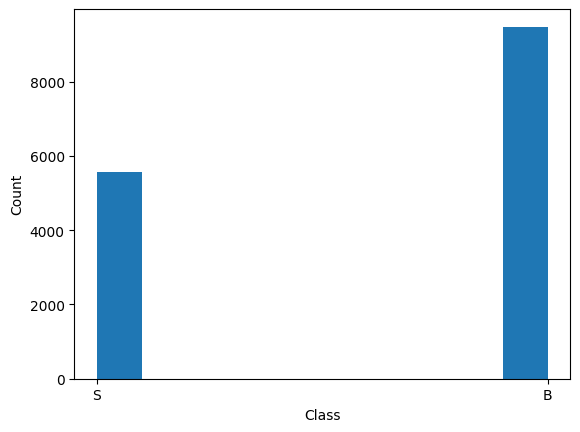

In [21]:
plt.hist(data["class"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

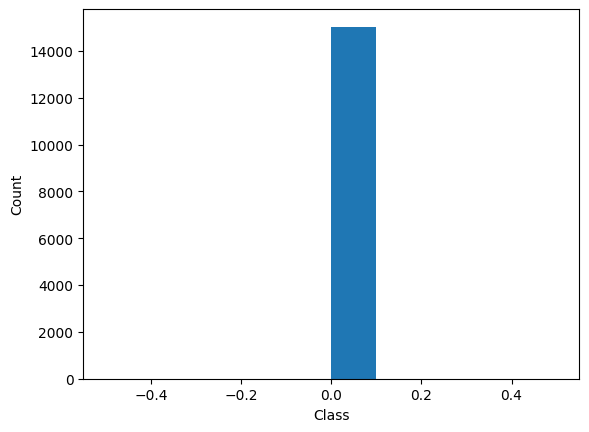

In [58]:
import pandas as pd

# class,B=Benign; S=Malware
# 'class' kolonundaki 'S' olanları 1, 'B' olanları 0 yapın
data['class'] = data['class'].apply(lambda x: 1 if x == 'S' else 0)

plt.hist(data["class"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [26]:
def kolonda_kelime_bulma(kelime):
    kolon_isimleri = data.columns
    signature_kolonlari = [kolon for kolon in kolon_isimleri if kelime in kolon]
    
    print(kelime, " İçeren Kolon İsimleri:")
    for indeks, kolon in enumerate(signature_kolonlari):
        print(f"  {kolon} - İndeks: {indeks}")
    
    print("Eleman sayisi:", len(signature_kolonlari))

In [27]:
kolonda_kelime_bulma("bindService")

bindService  İçeren Kolon İsimleri:
  bindService - İndeks: 0
  Context.bindService - İndeks: 1
Eleman sayisi: 2


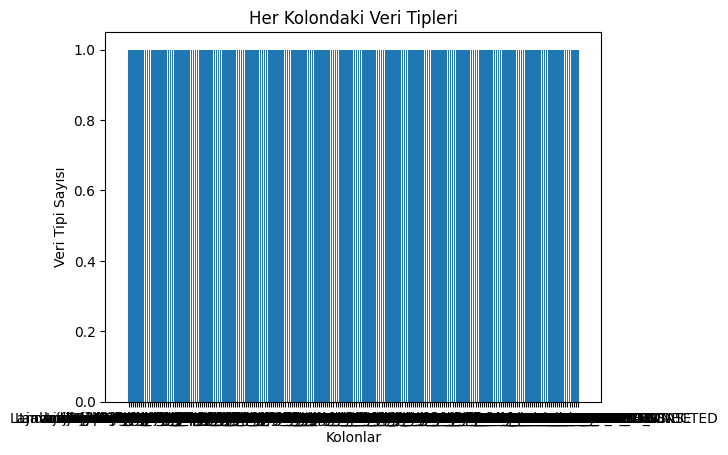

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data_types(data):
    data_types_count = {}

    for column in data.columns:
        data_type = str(data[column].dtype)
        data_types_count[column] = data_types_count.get(data_type, 0) + 1

    plt.bar(data_types_count.keys(), data_types_count.values())
    plt.xlabel('Kolonlar')
    plt.ylabel('Veri Tipi Sayısı')
    plt.title('Her Kolondaki Veri Tipleri')
    plt.show()


plot_data_types(data)


## Veri Tipi Kontrolü

In [29]:
import pandas as pd

def check_data_types(data):
    data_types_count = {}
    columns_with_types = {}

    for column in data.columns:
        data_type = data[column].dtype
        data_types_count[str(data_type)] = data_types_count.get(str(data_type), 0) + 1
        columns_with_types.setdefault(str(data_type), []).append(column)

    return data_types_count, columns_with_types


data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

data_types_count, columns_with_types = check_data_types(data)

print("Veri Tipleri ve Sayıları:")
for data_type, count in data_types_count.items():
    print(f"{data_type}: {count}")

print("\nHer Kolondaki Veri Tipleri:")
for data_type, columns in columns_with_types.items():
    print(f"{data_type}: {', '.join(columns)}")


Veri Tipleri ve Sayıları:
int64: 214
object: 2

Her Kolondaki Veri Tipleri:
int64: transact, onServiceConnected, bindService, attachInterface, ServiceConnection, android.os.Binder, SEND_SMS, Ljava.lang.Class.getCanonicalName, Ljava.lang.Class.getMethods, Ljava.lang.Class.cast, Ljava.net.URLDecoder, android.content.pm.Signature, android.telephony.SmsManager, READ_PHONE_STATE, getBinder, ClassLoader, Landroid.content.Context.registerReceiver, Ljava.lang.Class.getField, Landroid.content.Context.unregisterReceiver, GET_ACCOUNTS, RECEIVE_SMS, Ljava.lang.Class.getDeclaredField, READ_SMS, getCallingUid, Ljavax.crypto.spec.SecretKeySpec, android.intent.action.BOOT_COMPLETED, USE_CREDENTIALS, MANAGE_ACCOUNTS, android.content.pm.PackageInfo, KeySpec, TelephonyManager.getLine1Number, DexClassLoader, HttpGet.init, SecretKey, Ljava.lang.Class.getMethod, System.loadLibrary, android.intent.action.SEND, Ljavax.crypto.Cipher, WRITE_SMS, READ_SYNC_SETTINGS, AUTHENTICATE_ACCOUNTS, android.telephony.gsm.S

/tmp/ipykernel_13355/2135063096.py:15: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


## Kolon Bulma

In [56]:
import pandas as pd

def kolon_bul(kolonName):
    if kolonName in data.columns:
        # Kolonun içerdiği değerleri yazdır
        print(f"{kolonName} Kolonu Değerleri:\n{data[kolonName].values}")

        # Kolondaki eleman sayısını yazdır
        eleman_sayisi = data[kolonName].count()
        print(f"{kolonName} Kolonundaki Eleman Sayısı: {eleman_sayisi}")

    else:
        print(f"{kolonName} Kolonu bulunamadı.")
        print("Kolonlar:", data.columns)
        print("Toplam Kolon Sayısı:", len(data.columns))



In [61]:
kolon_bul("getSimCountryIso")

getSimCountryIso Kolonu bulunamadı.
Kolonlar: Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)
Toplam Kolon Sayısı: 216


## EĞİTİM TEST DİYE BÖLME 

In [30]:
y = data["class"]
x = data.drop("class", axis=1)

In [31]:
print("x: ",x.shape)
print("y: ",y.shape)

x:  (15036, 215)
y:  (15036,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (12028, 215)
X_test:  (3008, 215)
y_train:  (12028,)
y_test:  (3008,)


In [65]:
import pandas as pd

data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

imza_tabanli_kolonlar = ['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder', 'android.content.pm.Signature', 'android.telephony.SmsManager']
anomali_tabanli_kolonlar = ['kolon1', 'kolon2', 'kolon3']  # Bu listeyi veri setinizdeki gerçek anomali tabanlı kolon adlarıyla güncelleyin

data['imza_tabanli_sayisi'] = data[imza_tabanli_kolonlar].sum()
data['anomali_tabanli_sayisi'] = data[anomali_tabanli_kolonlar].sum()

toplam_imza_tabanli_sayisi = data['imza_tabanli_sayisi'].sum()
toplam_anomali_tabanli_sayisi = data['anomali_tabanli_sayisi'].sum()

print(f"Toplam Imza Tabanlı Kolon Sayısı: {toplam_imza_tabanli_sayisi}")
print(f"Toplam Anomali Tabanlı Kolon Sayısı: {toplam_anomali_tabanli_sayisi}")


/tmp/ipykernel_13355/1473851395.py:3: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


KeyError: "None of [Index(['kolon1', 'kolon2', 'kolon3'], dtype='object')] are in the [columns]"